In [1]:
# Importing necessary libraries for data manipulation, visualization, preprocessing, 
# feature selection, model training, and evaluation.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
df = pd.read_csv('cars_data.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495.0,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989.0,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990.0,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495.0,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999.0,Manual,19353,Petrol,125,54.3,1.2,ford


In [3]:
df.shape

(97712, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
model           97712 non-null object
year            97712 non-null int64
price           96727 non-null float64
transmission    97712 non-null object
mileage         97712 non-null int64
fuelType        93586 non-null object
tax             97712 non-null int64
mpg             94256 non-null float64
engineSize      97712 non-null float64
Manufacturer    97712 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 7.5+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,97712.0,2017.066502,2.118661,1970.0,2016.0,2017.0,2019.0,2024.0
price,96727.0,16774.299823,9874.715050,450.0,9999.0,14471.0,20750.0,159999.0
mileage,97712.0,23219.475499,21060.882301,1.0,7673.0,17682.5,32500.0,323000.0
tax,97712.0,120.142408,63.357250,0.0,125.0,145.0,145.0,580.0
mpg,94256.0,55.228326,16.296400,0.3,47.1,54.3,62.8,470.8
engineSize,97712.0,1.664913,0.558574,0.0,1.2,1.6,2.0,6.6


In [6]:
df.isnull().sum()

model              0
year               0
price            985
transmission       0
mileage            0
fuelType        4126
tax                0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64

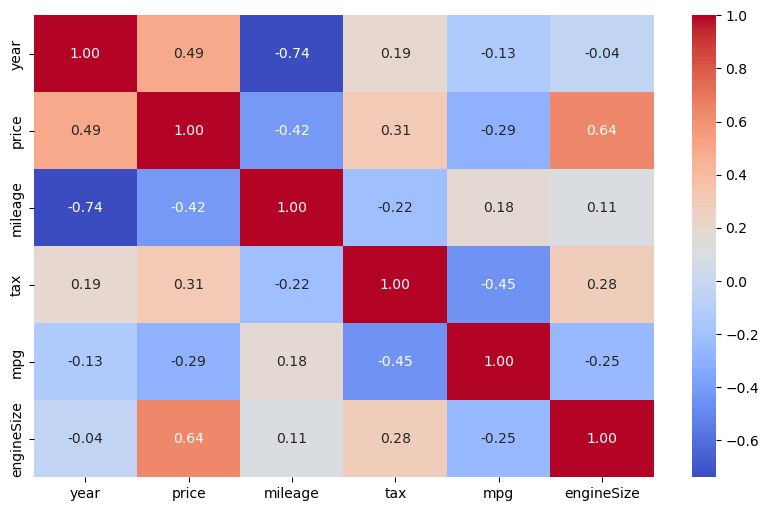

In [7]:
# Selecting only numerical columns and plotting a heatmap to visualize the correlation 
# between different numerical features in the dataset.
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

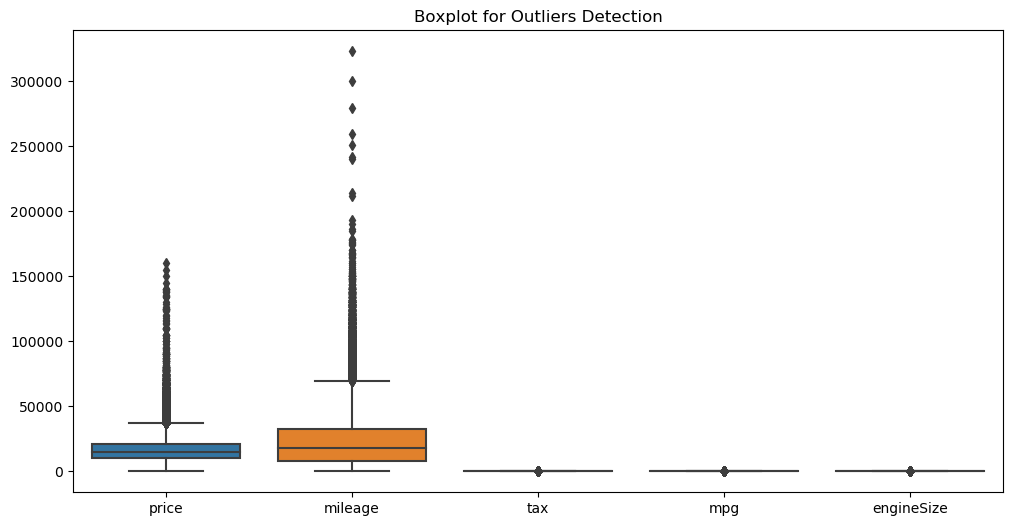

In [8]:
# Creating a boxplot to detect outliers in key numerical features (price, mileage, tax, mpg, engineSize).
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['price', 'mileage', 'tax', 'mpg', 'engineSize']])
plt.title("Boxplot for Outliers Detection")
plt.show()

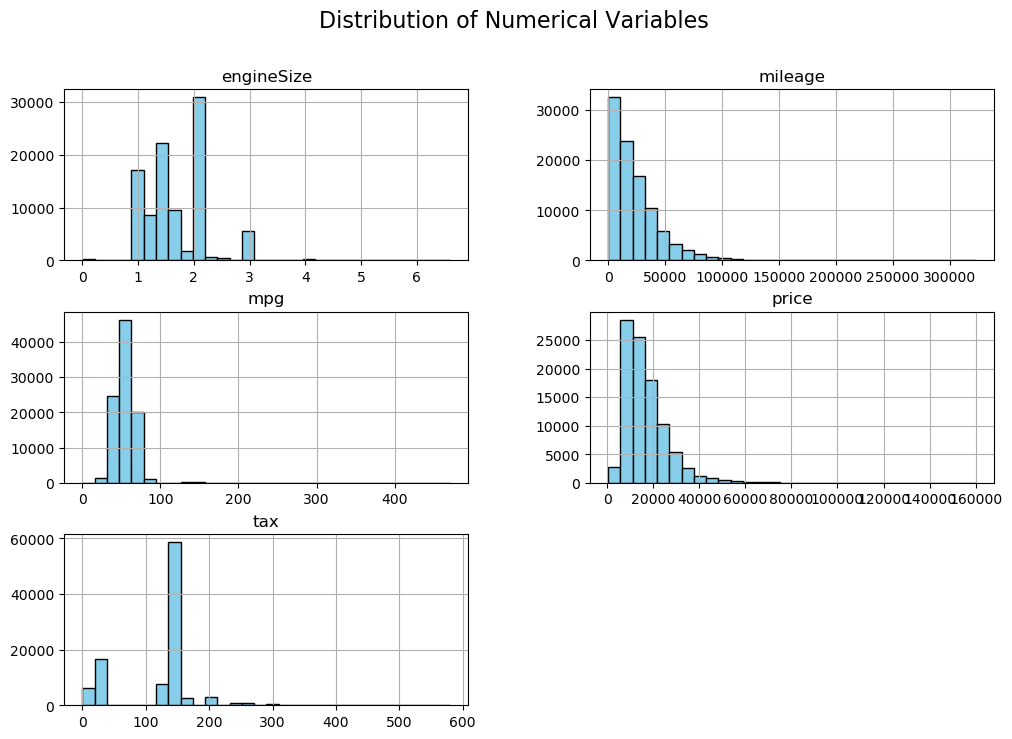

In [9]:
num_cols = ['price', 'mileage', 'tax', 'mpg', 'engineSize']
df[num_cols].hist(figsize=(12,8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

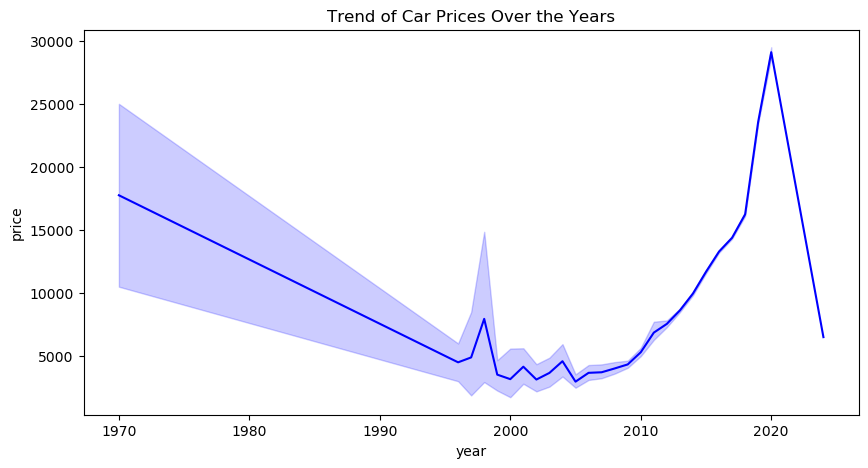

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='price', color="b")
plt.title("Trend of Car Prices Over the Years")
plt.show()

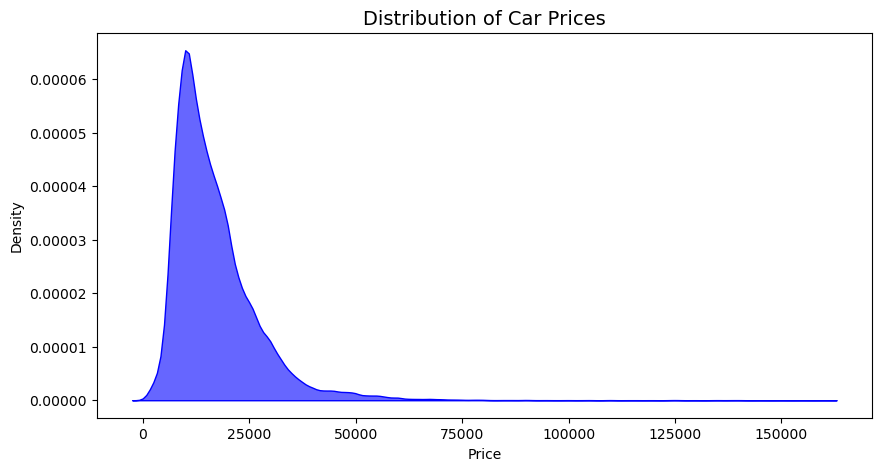

In [11]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['price'], fill=True, color='blue', alpha=0.6)
plt.title("Distribution of Car Prices", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

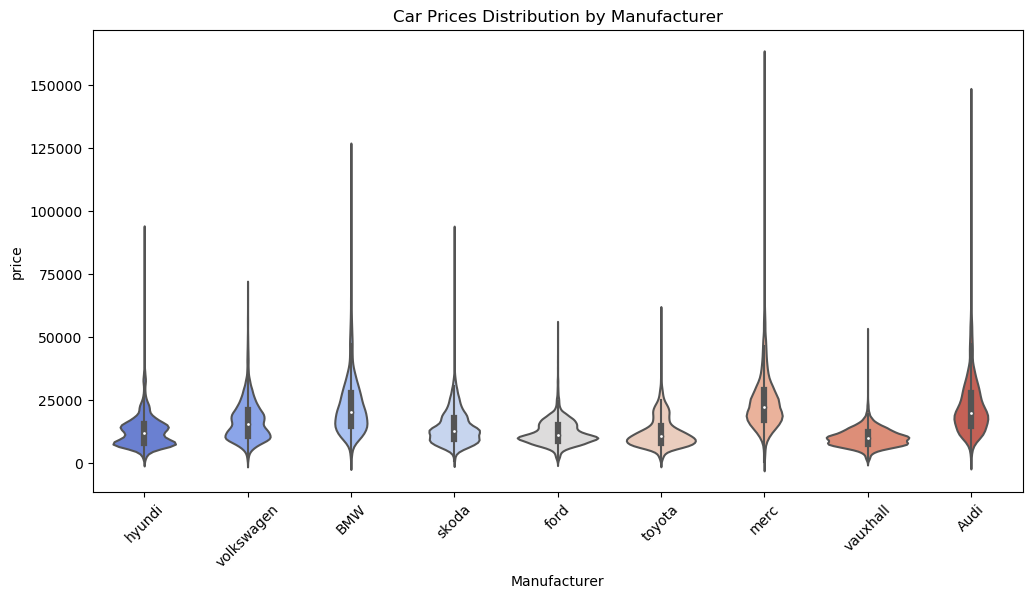

In [12]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='Manufacturer', y='price', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Car Prices Distribution by Manufacturer")
plt.show()

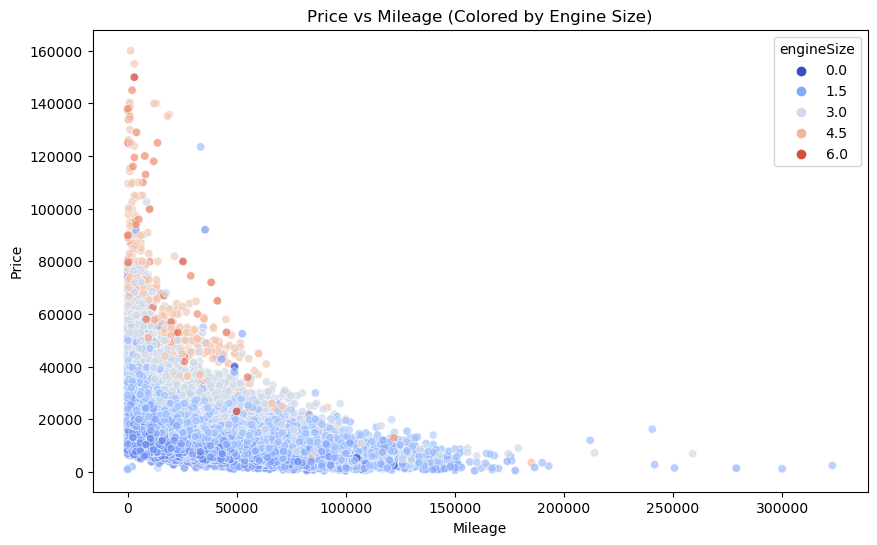

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['mileage'], y=df['price'], hue=df['engineSize'], palette="coolwarm", alpha=0.7)
plt.title("Price vs Mileage (Colored by Engine Size)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

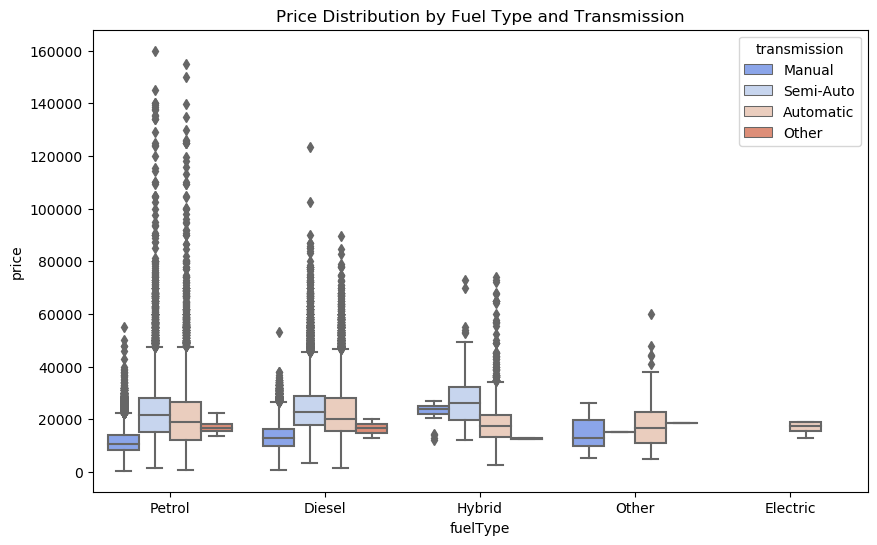

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['fuelType'], y=df['price'], hue=df['transmission'], palette="coolwarm")
plt.title("Price Distribution by Fuel Type and Transmission")
plt.show()

In [15]:
df['fuelType'].value_counts()

Petrol      51706
Diesel      38696
Hybrid       2938
Other         241
Electric        5
Name: fuelType, dtype: int64

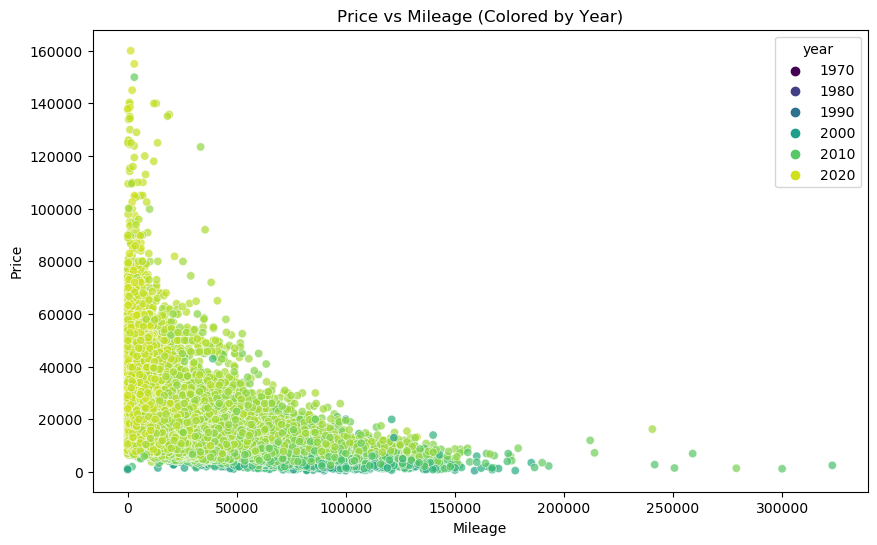

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['mileage'], y=df['price'], hue=df['year'], palette="viridis", alpha=0.7)
plt.title("Price vs Mileage (Colored by Year)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

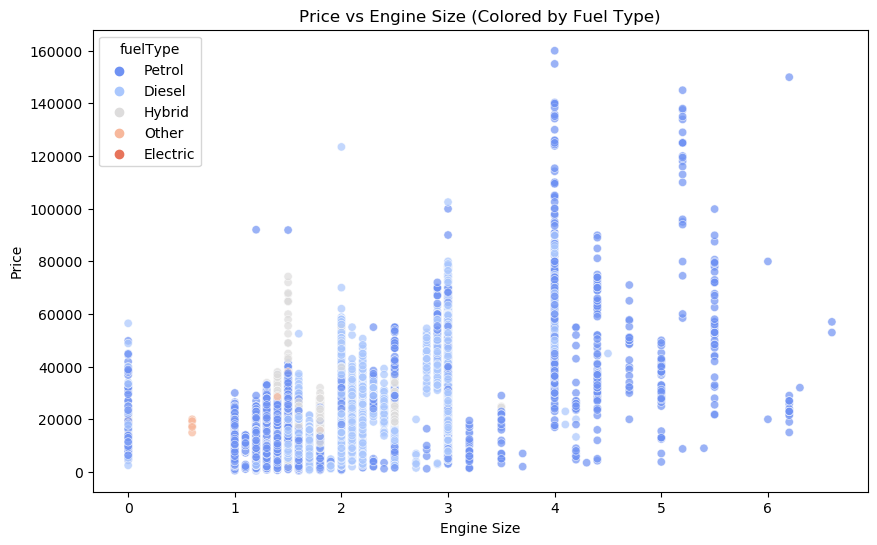

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['engineSize'], y=df['price'], hue=df['fuelType'], palette="coolwarm", alpha=0.7)
plt.title("Price vs Engine Size (Colored by Fuel Type)")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

In [18]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495.0,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989.0,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990.0,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495.0,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999.0,Manual,19353,Petrol,125,54.3,1.2,ford


In [19]:
df.shape

(97712, 10)

In [20]:
df.isnull().sum()

model              0
year               0
price            985
transmission       0
mileage            0
fuelType        4126
tax                0
mpg             3456
engineSize         0
Manufacturer       0
dtype: int64

In [21]:
df = df.dropna(subset=['price'])

In [22]:
df['fuelType'] = df.groupby('model')['fuelType'].transform(lambda x: x.fillna(x.mode()[0]))

In [23]:
df['mpg'] = df.groupby(['engineSize', 'fuelType'])['mpg'].transform(lambda x: x.fillna(x.mean()))

In [24]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [25]:
df['engineSize'].value_counts()

2.0    26595
1.0    16945
1.5    11125
1.4    10774
1.6     8605
1.2     6645
3.0     5356
2.1     3944
1.8     1696
1.3     1290
1.7      897
1.1      550
2.2      464
2.5      447
4.0      350
0.0      262
2.9      167
2.3      144
4.4       79
2.4       71
5.0       51
5.5       44
2.8       41
1.9       27
3.2       26
4.2       25
4.7       24
5.2       23
3.5       20
6.2       13
2.7        8
0.6        7
6.6        2
4.1        2
3.7        2
6.0        2
5.4        1
4.3        1
4.5        1
6.3        1
Name: engineSize, dtype: int64

In [26]:
df[df['engineSize'] == 0.0]['fuelType'].value_counts()

Petrol      153
Diesel       68
Hybrid       38
Electric      2
Other         1
Name: fuelType, dtype: int64

In [27]:
df = df[~df['fuelType'].isin(['Electric', 'Other'])]

In [28]:
df = df[df['engineSize'] != 0.0]

In [29]:
df = pd.get_dummies(df, columns=['transmission', 'fuelType', 'Manufacturer'], drop_first=True, dtype=np.int64)

In [30]:
le = LabelEncoder()
df['model'] = le.fit_transform(df['model'])

In [31]:
X = df.drop(columns=['price']) 
y = df['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}


results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f"{name}: RMSE = {rmse:.2f}")
sorted_results = sorted(results.items(), key=lambda x: x[1])

results_df = pd.DataFrame(sorted_results, columns=['Model', 'RMSE'])

plt.figure(figsize=(10, 5))
sns.barplot(x="RMSE", y="Model", data=results_df, palette="coolwarm")
plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Root Mean Squared Error (RMSE)")
plt.ylabel("Model")
plt.show()

NameError: name 'LinearRegression' is not defined

In [ ]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    r2 = r2_score(y_test, y_pred)  
    accuracy_results[name] = r2
    print(f"{name}: R² Score = {r2:.2f} %")

sorted_accuracy = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)

Linear Regression: R² Score = 0.78 %
Decision Tree: R² Score = 0.93 %
Random Forest: R² Score = 0.96 %


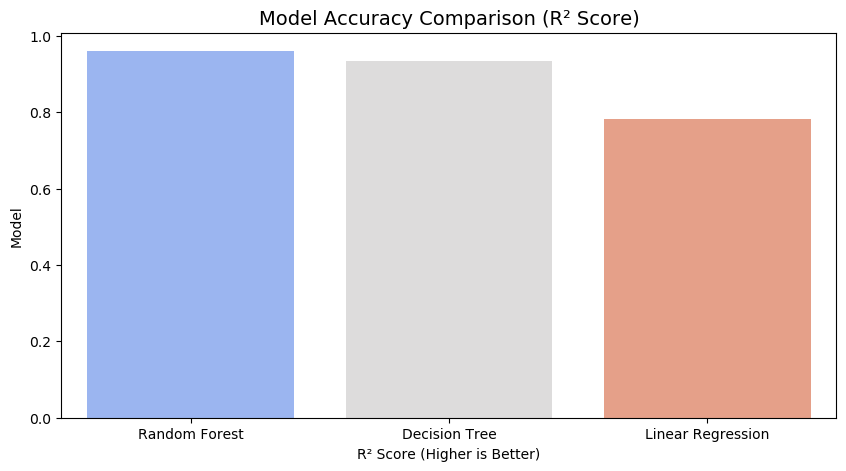

In [ ]:
accuracy_df = pd.DataFrame(sorted_accuracy, columns=['Model', 'R² Score'])

plt.figure(figsize=(10, 5))
sns.barplot(y="R² Score", x="Model", data=accuracy_df, palette="coolwarm")
plt.title("Model Accuracy Comparison (R² Score)", fontsize=14)
plt.xlabel("R² Score (Higher is Better)")
plt.ylabel("Model")
plt.show()